# Importing libraries and datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [ ]:
df1 =pd.read_excel('/content/Nanyang_pte_Bedok.xlsx')
df2 =pd.read_excel('/content/Nanyang_pte_Jurong.xlsx')
df3 =pd.read_excel('/content/Nanyang_pte_Malaysia.xlsx')
df4 =pd.read_excel('/content/Nanyang_pte_USA.xlsx')

In [ ]:
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   NRIC            364 non-null    object        
 1   Member_Name     364 non-null    object        
 2   Birthdate       364 non-null    datetime64[ns]
 3   Cred Card User  364 non-null    int64         
 4   Purchases       364 non-null    int64         
 5   Amount Spent    364 non-null    int64         
 6   Year Joined     364 non-null    int64         
 7   Income          364 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 22.9+ KB


,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Income
0,S9648157T,Nicholas Armstrong,1996-08-17,0,6,3120,1996,32500
1,S8414292J,Alice Marsh,1984-11-22,0,1,430,1985,116300
2,S9134073M,Jason Castro,1991-08-14,0,2,1080,1992,101700
3,S9249303K,Tanya Reeves,1992-11-15,0,4,2090,1993,75300
4,S9485975U,Heidi Hodges,1994-03-21,0,4,2130,1995,74600


In [ ]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   NRIC            387 non-null    object        
 1   Member_Name     387 non-null    object        
 2   Birthdate       387 non-null    datetime64[ns]
 3   Cred Card User  387 non-null    int64         
 4   Purchases       387 non-null    int64         
 5   Amount Spent    387 non-null    int64         
 6   Year Joined     387 non-null    int64         
 7   Income          387 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 24.3+ KB


,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Income
0,S8139863E,Casey Clark,1981-06-26,0,4,2010,1981,35800
1,S8773725F,Georgia Cohen,1987-05-24,0,4,1840,1987,85100
2,S9424032P,Catherine Hughes,1994-03-15,0,4,2090,1994,79100
3,S9871877T,Chester Estrada,1998-08-17,0,4,2020,1998,60300
4,S8426528E,Wilfred Roberson,1984-04-08,0,2,1130,1985,24300


In [ ]:
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   NRIC            348 non-null    object        
 1   Given Name      348 non-null    object        
 2   Family Name     348 non-null    object        
 3   Birthdate       348 non-null    datetime64[ns]
 4   Cred Card User  348 non-null    object        
 5   Purchases       348 non-null    int64         
 6   Amount Spent    348 non-null    int64         
 7   Year Joined     348 non-null    int64         
 8   Income          348 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 24.6+ KB


,NRIC,Given Name,Family Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Income
0,S9880670H,Marie,Cox,1998-05-25,0,18,23481,1918,39700
1,S9844148D,Wilfred,Mack,1998-05-15,0,1,530,1920,32200
2,S8290078K,Ted,Young,1982-11-09,1,8,3840,1982,136200
3,S9168981H,Colleen,Reeves,1991-09-16,1,9999,9999,1991,89500
4,S9955937D,Georgia,Brown,1999-11-19,1,4,1920,1999,75200


In [ ]:
df4.info()
df4.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   NRIC            407 non-null    object        
 1   First Name      407 non-null    object        
 2   Last Name       407 non-null    object        
 3   Birthdate       407 non-null    datetime64[ns]
 4   Cred Card User  407 non-null    object        
 5   Purchases       407 non-null    int64         
 6   Amount Spent    407 non-null    int64         
 7   Year Joined     407 non-null    int64         
 8   Income          407 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 28.7+ KB


,NRIC,First Name,Last Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Income
0,S9634931P,Gerald,Ingram,1996-10-14,No,4,1870,1996,74700
1,S8489467J,Todd,Curtis,1984-11-17,Yes,2,1000,1985,80300
2,S8461559K,Felicia,Watkins,1984-01-06,No,3,1500,1985,79000
3,S8565425T,Muriel,Robinson,1985-07-20,No,5,2410,1986,134100
4,S8784312G,Jon,Greer,1987-10-14,No,1,580,1988,40000


# Standardising data across all datasets to prepare for merging

1. Joining given names and family names, and first names and last names into member name
2. Standardising the values in 'Cred Card User' column
3. Appending 'Region' into each dataset

## Standardising names

In [ ]:
df3['Member_Name'] = df3['Given Name'] + ' ' + df3['Family Name']
df3.drop(['Given Name','Family Name'], axis=1, inplace=True)
df3.head()

,NRIC,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Income,Member_Name
0,S9880670H,1998-05-25,0,18,23481,1918,39700,Marie Cox
1,S9844148D,1998-05-15,0,1,530,1920,32200,Wilfred Mack
2,S8290078K,1982-11-09,1,8,3840,1982,136200,Ted Young
3,S9168981H,1991-09-16,1,9999,9999,1991,89500,Colleen Reeves
4,S9955937D,1999-11-19,1,4,1920,1999,75200,Georgia Brown


In [ ]:
df4['Member_Name'] = df4['First Name'] + ' ' + df4['Last Name']
df4.drop(['First Name','Last Name'], axis=1, inplace=True)
df4.head()

,NRIC,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Income,Member_Name
0,S9634931P,1996-10-14,No,4,1870,1996,74700,Gerald Ingram
1,S8489467J,1984-11-17,Yes,2,1000,1985,80300,Todd Curtis
2,S8461559K,1984-01-06,No,3,1500,1985,79000,Felicia Watkins
3,S8565425T,1985-07-20,No,5,2410,1986,134100,Muriel Robinson
4,S8784312G,1987-10-14,No,1,580,1988,40000,Jon Greer


## Standardising values in 'Cred Card User' column

In [ ]:
#df3['Cred Card User'].astype(int)

In [ ]:
df3['Cred Card User'].unique()

array(['0', '1', 'Yes'], dtype=object)

In [ ]:
df3['Cred Card User'] =df3['Cred Card User'].replace('Yes',1).astype(int)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   NRIC            348 non-null    object        
 1   Birthdate       348 non-null    datetime64[ns]
 2   Cred Card User  348 non-null    int64         
 3   Purchases       348 non-null    int64         
 4   Amount Spent    348 non-null    int64         
 5   Year Joined     348 non-null    int64         
 6   Income          348 non-null    int64         
 7   Member_Name     348 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 21.9+ KB


In [ ]:
df4['Cred Card User'] =df4['Cred Card User'].map({'Yes':1, 'No':0}).astype(int)
df4.head()

,NRIC,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Income,Member_Name
0,S9634931P,1996-10-14,0,4,1870,1996,74700,Gerald Ingram
1,S8489467J,1984-11-17,1,2,1000,1985,80300,Todd Curtis
2,S8461559K,1984-01-06,0,3,1500,1985,79000,Felicia Watkins
3,S8565425T,1985-07-20,0,5,2410,1986,134100,Muriel Robinson
4,S8784312G,1987-10-14,0,1,580,1988,40000,Jon Greer


## Appending 'Region' into each dataset

In [ ]:
df1['Region']='Bedok'
df2['Region']='Jurong'
df3['Region']='Malaysia'
df4['Region']='USA'

# Merging datasets

In [ ]:
df = pd.concat([df1,df2,df3,df4]).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   NRIC            1506 non-null   object        
 1   Member_Name     1506 non-null   object        
 2   Birthdate       1506 non-null   datetime64[ns]
 3   Cred Card User  1506 non-null   int64         
 4   Purchases       1506 non-null   int64         
 5   Amount Spent    1506 non-null   int64         
 6   Year Joined     1506 non-null   int64         
 7   Income          1506 non-null   int64         
 8   Region          1506 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 106.0+ KB


# Data profiling

In [ ]:
df.describe(include='all')

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Income,Region
count,1506,1506,1506,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506
unique,1501,1499,NaN,NaN,NaN,NaN,NaN,NaN,4
top,S9724300C,Alexander Barnett,NaN,NaN,NaN,NaN,NaN,NaN,USA
freq,3,3,NaN,NaN,NaN,NaN,NaN,NaN,407
mean,NaN,NaN,1988-04-09 03:29:24.143426304,0.397742,129.821381,3092.456839,2008.370518,83309.362550,NaN
min,NaN,NaN,1972-01-16 00:00:00,0.000000,0.000000,0.000000,1918.000000,21800.000000,NaN
25%,NaN,NaN,1980-07-11 18:00:00,0.000000,2.000000,980.000000,2000.000000,53150.000000,NaN
50%,NaN,NaN,1988-11-01 12:00:00,0.000000,3.000000,1500.000000,2011.000000,83400.000000,NaN
75%,NaN,NaN,1995-12-24 12:00:00,1.000000,4.000000,2090.000000,2018.000000,114550.000000,NaN
max,NaN,NaN,2005-03-15 00:00:00,1.000000,9999.000000,64673.000000,2025.000000,143900.000000,NaN


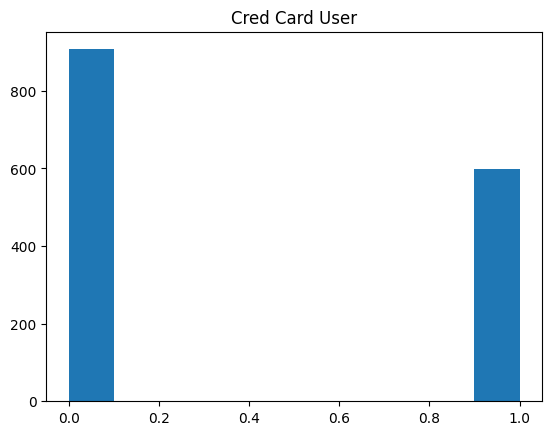

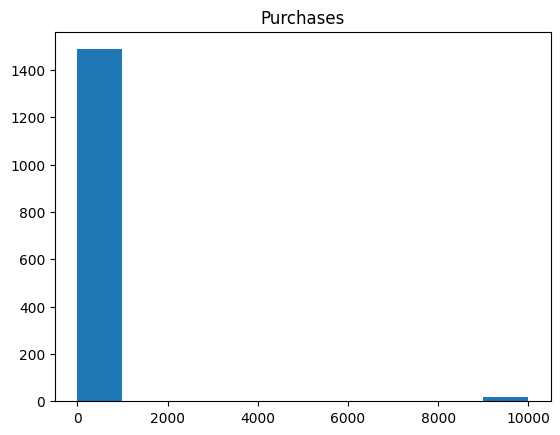

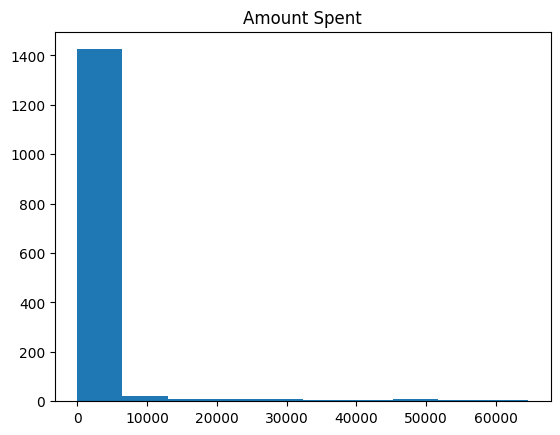

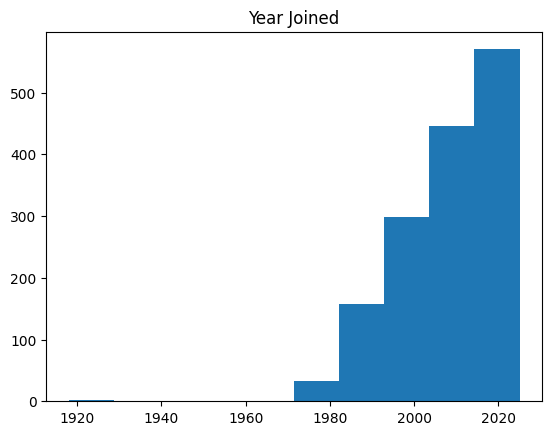

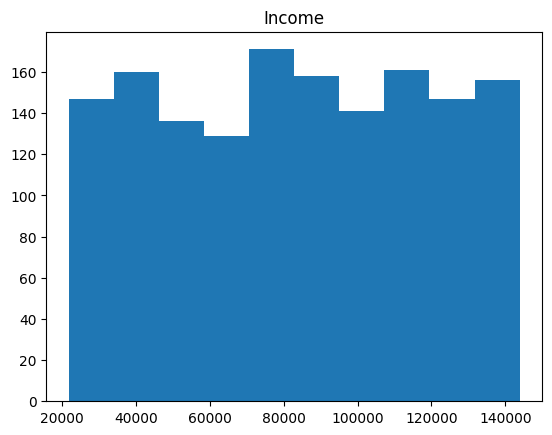

In [ ]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
  plt.hist(df[col])
  plt.title(col)
  plt.show()

# Data cleaning

## NRIC
NRIC is a unique identifier.\
There are 1506 records, however only 1501 are unique.

In [ ]:
nric_dup =df[df['NRIC'].duplicated()]['NRIC']
df[df['NRIC'].isin(nric_dup)].sort_values('NRIC')

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Income,Region
963,S7643927M,Kenny Lindsey,1976-09-28,1,4,2050,2001,48200,Malaysia
991,S7643927M,Kenny Lindsey,1976-09-28,1,4,2050,2003,88800,Malaysia
1132,S9219156K,Ricardo Marsh,1992-10-30,0,6,2910,1996,118800,USA
1443,S9219156K,Ricardo Marsh,1992-10-30,0,6,2910,2025,74600,USA
426,S9717736T,Levi Wolfe,1997-09-06,0,3,1410,2005,127400,Jurong
588,S9717736T,Levi Wolfe,1997-09-06,0,3,1410,2019,124100,Jurong
1153,S9724300C,Alexander Barnett,1997-07-31,0,5,2540,2003,132900,USA
1266,S9724300C,Alexander Barnett,1997-07-31,0,5,2540,2015,28300,USA
1267,S9724300C,Alexander Barnett,1997-07-31,0,5,2540,2015,67200,USA


All values are the same with the exception of 'Year Joined'.\
The data owner has instructed to keep only the earliest record.

In [ ]:
df.sort_values('Year Joined', ascending=True, inplace=True)
df.drop_duplicates(subset='NRIC', keep='first', inplace=True)
df[df['NRIC'].duplicated()] #This should now return blank

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Income,Region


## Outliers / Extreme values
1. Purchases
2. Amount Spent
3. Year Joined

### Purchases
The max purchase is 9999 while the 75% quartile is only 4.
This column is likely to contain errors.

In [ ]:
print(np.sort(df['Purchases'].unique()))

[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   17   18   19   21   22   23   24   25   26   27   28   29
   30 9999]


In [ ]:
df[df['Purchases']==9999]

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Income,Region
1138,S7894382V,Bruce Mcdaniel,1978-08-01,1,9999,9999,1983,112600,USA
1111,S8487511L,Melody Castillo,1984-05-26,1,9999,9999,1986,50100,USA
1147,S8130293F,Aaron Baker,1981-06-14,0,9999,9999,1987,115700,USA
850,S7536969F,Catherine Griffin,1975-10-12,0,9999,9999,1989,141600,Malaysia
754,S9168981H,Colleen Reeves,1991-09-16,1,9999,9999,1991,89500,Malaysia
900,S7550976X,Desiree Phelps,1975-02-11,0,9999,9999,1995,22100,Malaysia
101,S8870248H,Lorena Doyle,1988-10-08,1,9999,9999,2000,46100,Bedok
768,S9855552R,Raquel Shelton,1998-09-22,1,9999,9999,2000,38700,Malaysia
118,S8767776D,Terence Larson,1987-09-05,1,9999,9999,2001,51600,Bedok
1122,S9984298Z,Joshua Love,1999-12-19,0,9999,9999,2002,54500,USA


In [ ]:
df[(df['Purchases'] != 9999) & (df['Amount Spent'] == 9999)]

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Income,Region


There are no other entries where 'Purchases' is not 9999 and 'Amount Spent' is 9999. This is likely an input error in both column.

If there were other values in 'Amount Spent' where 'Purchases' == 9999, we could impute the 'Purchases' column with the mean.

However, in doing so, it may skew the data. Furthermore, any further analysis will not yield any meaningful results as any calculations on the imputed value will always return an aggregate of '9999'.

Therefore I will choose to replace these values with 0 instead.

In [ ]:
df.loc[df['Purchases'] == 9999, 'Purchases'] = 0
df.loc[df['Amount Spent'] == 9999, 'Amount Spent'] = 0
df.describe()

,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Income
count,1501,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000
mean,1988-04-04 00:31:39.533644288,0.398401,3.668887,2968.560293,2008.347102,83331.712192
min,1972-01-16 00:00:00,0.000000,0.000000,0.000000,1918.000000,21800.000000
25%,1980-07-11 00:00:00,0.000000,2.000000,970.000000,2000.000000,53100.000000
50%,1988-10-16 00:00:00,0.000000,3.000000,1490.000000,2011.000000,83400.000000
75%,1995-12-23 00:00:00,1.000000,4.000000,2060.000000,2018.000000,114600.000000
max,2005-03-15 00:00:00,1.000000,30.000000,64673.000000,2025.000000,143900.000000
std,NaN,0.489732,3.754503,7703.279148,12.187539,35350.714755


### Amount Spent
The value for max 'Amount Spent' (64673) is much higher than the 75% quantile (2060).

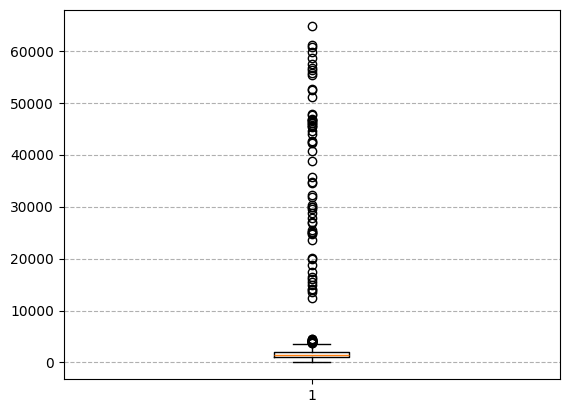

In [ ]:
plt.boxplot(df['Amount Spent'])
plt.grid(True, axis='y', linestyle='--')
plt.show()

In [ ]:
Q1 = df['Amount Spent'].quantile(0.25)
Q3 = df['Amount Spent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers =df[(df['Amount Spent'] < lower_bound) | (df['Amount Spent'] > upper_bound)]
masked_df =df[~df.index.isin(outliers.index)]
print(len(df)-len(masked_df))
print(round(100-(len(masked_df)/len(df)*100),1),'%')

78
5.2 %


There are 78 outliers (5.2% of the dataset) that fall outside of the inter quartile range.

Even though these data points are outliers, they may contain information on customer spending patterns.

They also appear to be bucketable based on the visualisation (10000-20000, 22000-35000, 38000-50000 and 50000-65000).

With further feature engineering, 'Amount Spent' could be converted to categorical data through binning and may be useful for modelling.

Therefore I will not remove these data points.

### Year Joined
The min year joined is 1918, while the min birth year is 1972.

In [ ]:
np.sort(df['Year Joined'].unique())

array([1918, 1920, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025])

In [ ]:
df[df['Year Joined'].isin([1918,1920])]

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Income,Region
751,S9880670H,Marie Cox,1998-05-25,0,18,23481,1918,39700,Malaysia
752,S9844148D,Wilfred Mack,1998-05-15,0,1,530,1920,32200,Malaysia


It is impossible for these members to join before they were even born. This is clearly an error.\
The best thing I can do here is find the average age joined and update the 'Year Joined' accordingly.

In [ ]:
df['age_joined']=df['Year Joined']-df['Birthdate'].dt.year
df[~df['Year Joined'].isin([1918,1920])][['age_joined']].mean().round()

,0
age_joined,21.0


In [ ]:
df.loc[df['Year Joined'].isin([1918, 1920]), 'Year Joined'] = df.loc[
    df['Year Joined'].isin([1918, 1920]), 'Birthdate'].dt.year + 21

In [ ]:
df['age_joined']=df['Year Joined']-df['Birthdate'].dt.year
df.describe()

,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Income,age_joined
count,1501,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000
mean,1988-04-04 00:31:39.533644288,0.398401,3.668887,2968.560293,2008.480346,83331.712192,20.723518
min,1972-01-16 00:00:00,0.000000,0.000000,0.000000,1980.000000,21800.000000,0.000000
25%,1980-07-11 00:00:00,0.000000,2.000000,970.000000,2000.000000,53100.000000,11.000000
50%,1988-10-16 00:00:00,0.000000,3.000000,1490.000000,2011.000000,83400.000000,20.000000
75%,1995-12-23 00:00:00,1.000000,4.000000,2060.000000,2018.000000,114600.000000,28.000000
max,2005-03-15 00:00:00,1.000000,30.000000,64673.000000,2025.000000,143900.000000,53.000000
std,NaN,0.489732,3.754503,7703.279148,11.748381,35350.714755,11.627561


## Imputing wrong values
If the customer has made any purchases, the amount spent shouldn't be 0.\
Likewise, if 'Amount Spent' contains any values above 0, 'Purchases' shouldn't be 0.

In [ ]:
df[(df['Purchases'] != 0) & (df['Amount Spent'] == 0)].sort_values(['Purchases'])

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Income,Region,age_joined
1133,S9535034D,Michael Myers,1995-03-02,1,6,0,1999,115000,USA,4
808,S9748215P,Emmett Logan,1997-01-24,1,6,0,2005,69400,Malaysia,8
146,T0498658O,Evan Chambers,2004-11-09,1,7,0,2020,25800,Bedok,16
523,S9715952K,Kelly Harrington,1997-04-25,0,18,0,2014,122500,Jurong,17


### Imputing 0 in 'Amount Spent' with mean of 'Purchases'

In [ ]:
mask = (df["Purchases"] != 0) & (df["Amount Spent"] == 0)
df.loc[mask, "Amount Spent"] = np.nan
df["Amount Spent"] = df["Amount Spent"].fillna(
    df.groupby("Purchases")["Amount Spent"].transform("mean").round())
df[mask]

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Income,Region,age_joined
1133,S9535034D,Michael Myers,1995-03-02,1,6,3501.0,1999,115000,USA,4
808,S9748215P,Emmett Logan,1997-01-24,1,6,3501.0,2005,69400,Malaysia,8
523,S9715952K,Kelly Harrington,1997-04-25,0,18,30616.0,2014,122500,Jurong,17
146,T0498658O,Evan Chambers,2004-11-09,1,7,8038.0,2020,25800,Bedok,16


### Imputing 0 in 'Purchases' with nearest neighbors of 'Amount Spent'

In [ ]:
df[(df['Purchases'] == 0) & (df['Amount Spent'] != 0)].sort_values(['Amount Spent'])

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Income,Region,age_joined
413,T0193823M,Jorge Murray,2001-05-29,0,0,1253.0,2008,37700,Jurong,7
547,T0037140L,Jaime Mclaughlin,2000-12-04,0,0,4451.0,2019,94000,Jurong,19
170,S7825207W,Jacquelyn Vega,1978-01-04,0,0,12500.0,1997,34600,Bedok,19
95,T0242544C,Fannie Webb,2002-08-06,0,0,25023.0,2013,56900,Bedok,11


'Amount Spent' is too specific to yield a mean 'Purchase' value.

We can only infer the value based on the nearest neighbours.

In [ ]:
mask = (df["Purchases"] == 0) & (df["Amount Spent"] != 0)
df.loc[mask, "Purchases"] = np.nan

In [ ]:
imp = KNNImputer(n_neighbors=1, weights="distance")
X = df[["Purchases", "Amount Spent"]].to_numpy(dtype=float)
X_imp = imp.fit_transform(X)
df["Purchases"] = X_imp[:, 0]
df[mask]

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Income,Region,age_joined
170,S7825207W,Jacquelyn Vega,1978-01-04,0,9.0,12500.0,1997,34600,Bedok,19
413,T0193823M,Jorge Murray,2001-05-29,0,3.0,1253.0,2008,37700,Jurong,7
95,T0242544C,Fannie Webb,2002-08-06,0,19.0,25023.0,2013,56900,Bedok,11
547,T0037140L,Jaime Mclaughlin,2000-12-04,0,9.0,4451.0,2019,94000,Jurong,19


# Data Anonymisation
1. Hashing NRIC & names
2. Generalizing birthdates

## Hashing NRIC & names

In [ ]:
import hashlib

def hash(val):
    return hashlib.sha256(val.encode()).hexdigest()[:8].strip()

df['Hashed_NRIC'] = df['NRIC'].apply(hash)
df['Hashed_Name'] = df['Member_Name'].apply(hash)
df[['Hashed_NRIC','Hashed_Name']].describe() #checking to see if all hashed values are unique

,Hashed_NRIC,Hashed_Name
count,1501,1501
unique,1501,1499
top,6a4c354e,67710ad5
freq,1,2


In [ ]:
df[df['Hashed_Name']== '67710ad5']

,NRIC,Member_Name,Birthdate,Cred Card User,Purchases,Amount Spent,Year Joined,Income,Region,age_joined,Hashed_NRIC,Hashed_Name
834,S7235936V,Kelly George,1972-01-16,0,3.0,1360.0,1984,126200,Malaysia,12,543d951f,67710ad5
1262,S9270874I,Kelly George,1992-05-05,1,2.0,1010.0,2010,76000,USA,18,ca592654,67710ad5


All hashed values are unique except for Kelly George, however this will not be a problem as the name look up will return the same values.

## Generalizing birthdate

In [ ]:
df['Birth Year'] = df['Birthdate'].dt.year
df.drop(['Birthdate'], axis=1, inplace=True)
df.head()

,NRIC,Member_Name,Cred Card User,Purchases,Amount Spent,Year Joined,Income,Region,age_joined,Hashed_NRIC,Hashed_Name,Birth Year
751,S9880670H,Marie Cox,0,18.0,23481.0,2019,39700,Malaysia,21,e3c4a361,35854115,1998
752,S9844148D,Wilfred Mack,0,1.0,530.0,2019,32200,Malaysia,21,78f599b8,2e63e32b,1998
1136,S7527818A,Gerard Sims,0,1.0,540.0,1980,110300,USA,5,f185a8d7,70fc2b81,1975
53,S7215504L,Carole Briggs,1,3.0,1400.0,1980,78700,Bedok,8,5e61c9d4,8a9058d5,1972
799,S7282385H,Damon Moss,0,4.0,2000.0,1980,75700,Malaysia,8,8f76aa6e,6dd7e8f3,1972


# Exporting cleaned dataset and lookup table

In [ ]:
lookup=df[['Hashed_NRIC','NRIC', 'Hashed_Name', 'Member_Name']]
df=df[['Hashed_NRIC', 'Hashed_Name', 'Birth Year', 'Cred Card User', 'Purchases',
       'Amount Spent', 'Year Joined', 'Income', 'Region']].sort_values('Region')

In [ ]:
df.to_excel('cleaned_data.xlsx', index=False)
lookup.to_excel('lookup.xlsx', index=False)